## Problem
Given a binary array nums, return the maximum length of a contiguous subarray with an equal number of 0 and 1.

**Example 1:**  
Input: nums = [0,1]  
Output: 2  
Explanation: [0, 1] is the longest contiguous subarray with an equal number of 0 and 1.  

**Example 2:**  
Input: nums = [0,1,0]  
Output: 2  
Explanation: [0, 1] (or [1, 0]) is a longest contiguous subarray with equal number of 0 and 1.  

**Example 3:**
Input: nums = [0,1,1,1,1,1,0,0,0]  
Output: 6  
Explanation: [1,1,1,0,0,0] is the longest contiguous subarray with equal number of 0 and 1.  

**Constraints:**
- 1 <= nums.length <= 10<sup>5</sup>
- nums[i] is either 0 or 1.

## Approach 1: Brute Force (will exceed time limit)
Consider every possible subarray within the given array, and count the number of 0's and 1's in each subarray. Finally, find out the maximum size subarray with equal no. of zeros and ones out of them.

### Complexity
Time Complexity: O(n<sup>2</sup>)
Space Complexity: O(1)

In [ ]:
class Solution {
public:
    int findMaxLength(std::vector<int>& nums) {
        int maxlen = 0;
        int n = nums.size();
        
        // Iterate over all possible subarray start positions
        for (int start = 0; start < n; ++start) {
            int zeroes = 0, ones = 0;
            
            // Iterate over all possible subarray end positions
            for (int end = start; end < n; ++end) {
                if (nums[end] == 0) {
                    ++zeroes;
                } else {
                    ++ones;
                }
                
                // Check if the current subarray has equal numbers of 0s and 1s
                if (zeroes == ones) {
                    maxlen = std::max(maxlen, end - start + 1);
                }
            }
        }
        
        return maxlen;
    }
};

In [ ]:
class Solution:
    def findMaxLength(self, nums):
        maxlen = 0
        n = len(nums)
        
        # Iterate over all possible subarray start positions
        for start in range(n):
            zeroes = 0
            ones = 0
            
            # Iterate over all possible subarray end positions
            for end in range(start, n):
                if nums[end] == 0:
                    zeroes += 1
                else:
                    ones += 1
                
                # Check if the current subarray has equal numbers of 0s and 1s
                if zeroes == ones:
                    maxlen = max(maxlen, end - start + 1)
        
        return maxlen

In [ ]:
public class Solution {
    public int findMaxLength(int[] nums) {
        int maxlen = 0;
        for (int start = 0; start < nums.length; start++) {
            int zeroes = 0, ones = 0;
            for (int end = start; end < nums.length; end++) {
                if (nums[end] == 0) {
                    zeroes++;
                } else {
                    ones++;
                }
                if (zeroes == ones) {
                    maxlen = Math.max(maxlen, end - start + 1);
                }
            }
        }
        return maxlen;
    }
}


## Approach 2: Hash Map

Imagine a `count` variable, which is used to store the relative number of ones and zeros encountered so far while traversing the array. The `count` variable is incremented by one for every 1 encountered and the same is decremented by one for every 0 encountered.

We start traversing the array from the beginning. If at any moment, the count becomes zero, it implies that we've encountered an equal number of zeros and ones from the beginning till the current index of the array(i).

Additionally, at any point, if we encounter the same count twice (not just 0) while traversing the array, it means that the number of zeros and ones are equal between the indices corresponding to the equal count values. 

e.g. [0 0 1 0 0 0 1 1]

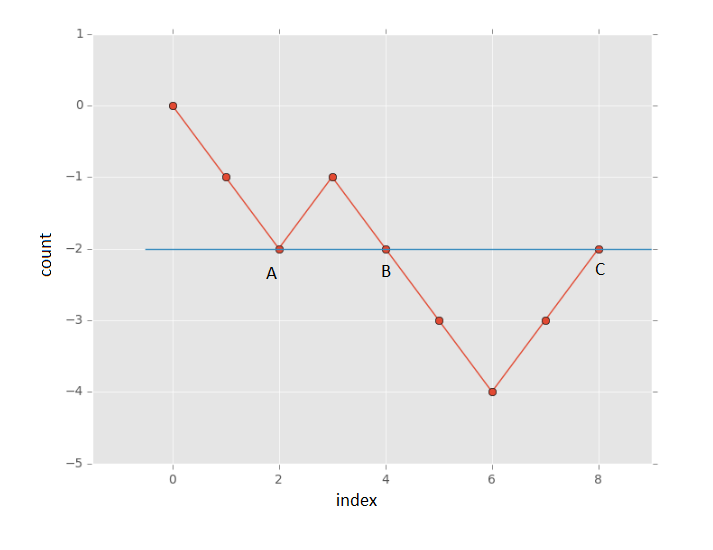

In the figure above, subarrays between (A,B), (B,C), and (A,C) (lying between indices corresponding to count=−2) have an equal number of zeros and ones.

Largest subarray = largest distance in index

We can use a hash map that maps values of count to the first index where that count was seen. We maintain the value of count and at each index, if we have seen the same value of count before, it means the subarray starting from where we saw that value of count and ending at the current index has an equal number of 0s and 1s. Otherwise, we put count in the map for future iterations.

### Complexity
Time Complexity: O(n)  
Space Complexity: O(n)

In [ ]:
from typing import List

class Solution:
    def findMaxLength(self, nums: List[int]) -> int:
        dic = {}
        dic[0] = -1
        ans = 0
        count = 0

        for i in range(len(nums)):
            if nums[i] == 1:
                count += 1
            else:
                count -= 1
            
            if count in dic:
                ans = max(ans, i - dic[count])
            else:
                dic[count] = i
        
        return ans

In [ ]:
public class Solution {

    public int findMaxLength(int[] nums) {
        Map<Integer, Integer> map = new HashMap<>();
        map.put(0, -1);
        int maxlen = 0, count = 0;
        for (int i = 0; i < nums.length; i++) {
            count = count + (nums[i] == 1 ? 1 : -1);
            if (map.containsKey(count)) {
                maxlen = Math.max(maxlen, i - map.get(count));
            } else {
                map.put(count, i);
            }
        }
        return maxlen;
    }
}